<a href="https://colab.research.google.com/github/bcury/Python-Projects/blob/main/SeriesTemporais_Suaviza%C3%A7%C3%A3o_Exp_HoltWinters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']  =15,8

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m')
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [14]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$alpha=0.2$')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


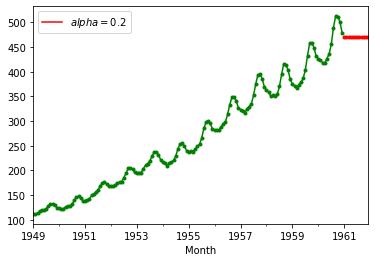

In [15]:
fcast1.plot(marker='.', color='r',legend=True)
fit1.fittedvalues.plot(marker='.',color='g');

#HoltWinters

In [16]:
fit1 = ExponentialSmoothing(data, seasonal_periods=12, trend='additive', seasonal='additive').fit(use_boxcox=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


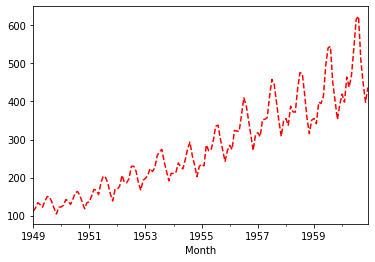

In [18]:
fit1.fittedvalues.plot(style='--', color='r');

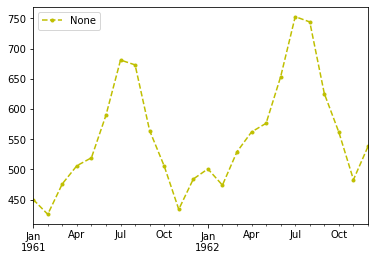

In [20]:
fit1.forecast(24).plot(style='--', marker='.',color='y',legend=True);

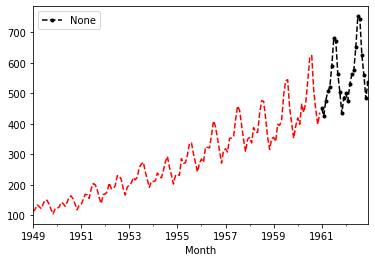

In [23]:
fit1.fittedvalues.plot(style='--', color='r')
fit1.forecast(24).plot(style='--', marker='.',color='black',legend=True);